Импорт библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

Считывание и предобработка данных:

In [2]:
df = pd.read_csv('checkins.dat', sep='|', header=0, skipinitialspace=True)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.dropna(inplace=True)
df.columns = [name.strip() for name in df.columns]
df = df.iloc[0:100000]

In [4]:
df

,id,user_id,venue_id,latitude,longitude,created_at
2,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
4,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
8,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
10,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
11,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18
...,...,...,...,...,...,...
233789,123888,1019078.0,1105563.0,33.575000,-117.725556,2011-12-11 05:38:19
233790,124366,771129.0,329847.0,37.629349,-122.400087,2011-12-11 04:55:34
233794,125556,804990.0,254046.0,29.762884,-95.383061,2011-12-11 06:54:20
233798,127250,526214.0,34473.0,32.802955,-96.769923,2011-12-11 10:05:38


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

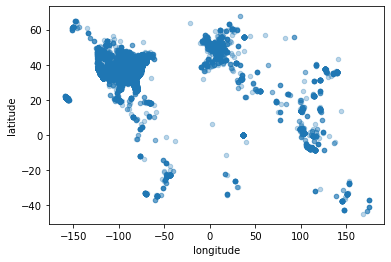

In [5]:
df.plot.scatter(x='longitude', y='latitude', alpha=0.3)

Кластеризация:

In [6]:
clustering = MeanShift(bandwidth=0.1)

In [7]:
clustering.fit(df[['latitude', 'longitude']])

MeanShift(bandwidth=0.1)

Координаты центров полученных кластеров:

In [10]:
cluster_centers_x = [el[1] for el in clustering.cluster_centers_]
cluster_centers_y = [el[0] for el in clustering.cluster_centers_]

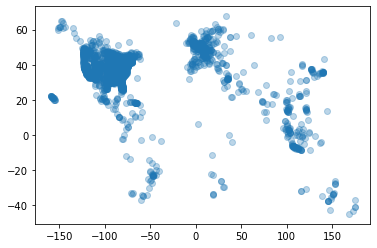

In [18]:
plt.scatter(x=cluster_centers_x, y=cluster_centers_y, alpha=0.3)

Получение номеров кластеров, в которых 15 элементов и больше:

In [13]:
good_labels = []
for label in set(clustering.labels_):
    if len(clustering.labels_[clustering.labels_ == label]) >= 15:
        good_labels.append(label)

Координаты 'хороших' кластеров:

In [45]:
cluster_centers = pd.DataFrame({'longitude': cluster_centers_x,
                                'latitude': cluster_centers_y, 'label': range(len(cluster_centers_x))})
good_cluster_centers = cluster_centers[cluster_centers['label'].isin(good_labels)]
good_cluster_centers

,longitude,latitude,label
0,-73.991835,40.717716,0
1,-112.002140,33.449438,1
2,-111.901888,33.446380,2
3,-87.629843,41.878244,3
4,-122.409330,37.688682,4
...,...,...,...
712,-122.940805,49.199791,712
727,-73.666619,41.220398,727
884,-88.445568,41.618532,884
1343,-77.182127,39.249469,1343


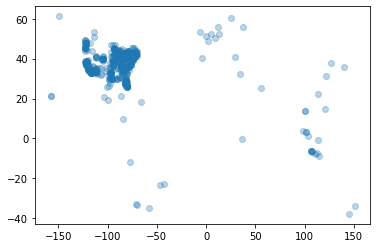

In [46]:
plt.scatter(x=good_cluster_centers['longitude'], y=good_cluster_centers['latitude'], alpha = 0.3)

Координаты офисов круизной компании:

In [38]:
office_addresses = [[34.2720355,-118.4693734], [33.7507188,-118.1889072], [27.9450524,-82.4455656],
                  [39.2650447,-76.6007999], [32.717609,-117.1761962], [37.804883,-122.4016302],
                  [49.2514431,-123.1277804], [32.7859233,-79.9333731], [30.6860768,-88.0394999],
                  [26.1216934,-80.1388889], [33.3882696,-111.6913768], [26.0853385,-80.1180988],
                  [30.0068944,-90.1633797], [29.3075638,-94.7986193], [28.4157244,-80.6310168],
                  [52.3787031,4.8849274], [47.3831508,8.4987319], [41.3905199,2.1570719],
                  [50.4356475,30.5142909], [53.4699633,-2.2947828]]

Определение ближайших к офисам центров кластеров:

In [42]:
best_centers = []
min_distance = 2000
closest_center = [1000, 1000]
for address in office_addresses:
    best_distance = 2000
    best_centers.append([1000, 1000])
    for i in range(len(good_cluster_centers)):
        distance = (address[0] - good_cluster_centers.iloc[i, 1]) ** 2 + (address[1] - good_cluster_centers.iloc[i, 0]) ** 2
        if distance < best_distance:
            best_distance = distance
            best_centers[-1] = [good_cluster_centers.iloc[i, 1], good_cluster_centers.iloc[i, 0]]
    if best_distance < min_distance:
        closest_center = best_centers[-1]
        min_distance = best_distance
best_centers

[[34.19818207092195, -118.54927680780146],
 [33.8098779552631, -118.14892380690813],
 [27.94944607964624, -82.4650735999998],
 [39.28625030782621, -76.61466929101515],
 [32.71134443394278, -117.15363874791043],
 [37.68868157406161, -122.40933037359147],
 [49.24017197830703, -123.11186022275179],
 [32.78430573736261, -79.9205039857143],
 [30.6943566, -88.04305410000003],
 [26.120862658633104, -80.1589066802157],
 [33.357344562325096, -111.82265410760392],
 [26.120862658633104, -80.1589066802157],
 [29.986731291666672, -90.20393365555552],
 [29.762697754725156, -95.3823137047244],
 [28.32970167241379, -80.67288769655171],
 [52.37296399032261, 4.892317222580647],
 [50.11151180000001, 8.6805059],
 [40.417455494444454, -3.700910200000001],
 [55.748349518181776, 37.62385041818183],
 [51.502991260887086, -0.12553728870967767]]

Центр с самым близким расположением к офису:

In [43]:
closest_center

[30.6943566, -88.04305410000003]